<a href="https://colab.research.google.com/github/romigiorgi/python-ciencia-datos/blob/main/Romina_Giorgi_Trabajo_Practico_REDES_NEURONALES_6_11_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TRABAJO PRACTICO- REDES NEURONALES***




#Apellido, Nombre, DNI, email de todos los integrantes del grupo:
Giorgi, Romina Paola

DNI: 32767651

rominapgiorgi@hotmail.com

Se les proporcionará una base de datos de ciudades de Argentina y los registros de Máxima y Mínima temperatura a lo largo de un año.Dicha base de datos fue obtenida del registro nacional de las siguientes enlaces: [detalle de la base de datos](https://datos.gob.ar/dataset/smn-registro-temperatura-365-dias/archivo/smn_5.1) - [REGISTRO DE TEMPERATURA 365 DIAS](https://www.smn.gob.ar/descarga-de-datos).

La base de datos también podra ser descargada del sigueinte enlace del drive [BASE DE DATOS](https://drive.google.com/drive/folders/18rTLeY5A8DOwz39TB563HPHIpZTJM3CA?usp=sharing)

Se deberá ralizar los siguientes pasos.


1.   Seleccionar una ciudad y reconstruir una nueva base de datos tomando la temperatura promedio entre la max y min de cada dia, para dicha ciudad. Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRAFICA SEA CRECIENTE. Esto servira para construir una nueva base de datos.


2.  Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:


   * VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR,  a menor temperatura el precio será menor. Definir el  rango del precio del helado y la tasa o porcentaje de incremento del precio
  
   * COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.

3. GENERAR TRES  PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE)CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:

  * SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. ( los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)

4. Luego de diseñar los perceptrones, implementarlos sobre la base de datos generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
#R.G.: Muestro la informacion de los datos que nos puede ayudar para saber con que tipo de variables contamos
#y la cantidad de columnas y filas del dataframe
df = pd.read_fwf('/content/registro_temperatura365d_smn.txt', header=None, widths=[8, 7, 6, 41], names=['FECHA', 'TMAX', 'TMIN', 'NOMBRE'], encoding='latin-1')

#R.G.: Guardo el DF en .csv
df.to_csv('datos.csv', index=False)

#R.G.: Leer el archivo CSV omitiendo la primera fila
df = pd.read_csv('datos.csv', skiprows=1)

#R.G.: Elimino la fila con en el indice 0
df = df.drop(0)

In [5]:
#R.G.: Muestro las primeras 10 filas
df.head(10)

,FECHA,TMAX,TMIN,NOMBRE
1,29102023,23.0,17.9,AEROPARQUE AERO
2,29102023,22.9,14.2,AZUL AERO
3,29102023,22.1,8.1,BAHIA BLANCA AERO
4,29102023,3.5,-0.3,BARILOCHE AERO
5,29102023,-4.7,-11.6,BASE BELGRANO II
6,29102023,-6.2,-9.4,BASE CARLINI (EX JUBANY)
7,29102023,-7.3,-13.7,BASE ESPERANZA
8,29102023,-9.5,-19.7,BASE MARAMBIO
9,29102023,-3.8,-8.2,BASE ORCADAS
10,29102023,-2.4,-12.8,BASE SAN MARTIN


In [6]:
#R.G.: Le doy formato a la fecha
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d%m%Y')
df = df.sort_values(by='FECHA')
df.head(10)

,FECHA,TMAX,TMIN,NOMBRE
43679,2022-10-30,24.8,9.8,VILLA REYNOLDS AERO
43590,2022-10-30,12.5,3.0,EL CALAFATE AERO
43591,2022-10-30,22.5,10.0,EL PALOMAR AERO
43592,2022-10-30,NaN,NaN,EL TREBOL
43593,2022-10-30,27.0,13.8,ESCUELA DE AVIACION MILITAR AERO
43594,2022-10-30,12.4,NaN,ESQUEL AERO
43595,2022-10-30,22.6,10.3,EZEIZA AERO
43596,2022-10-30,32.2,20.1,FORMOSA AERO
43597,2022-10-30,21.3,8.5,GENERAL PICO AERO
43598,2022-10-30,16.4,0.5,GOBERNADOR GREGORES AERO


In [7]:
# R.G.: Verifico si hay valores nulos en el DataFrame
valores_nulos = df.isnull().sum()
print("Valores nulos: ")
print(valores_nulos)

print("\n")
#R.G.: Verifico si hay valores 0 en el DataFrame
contar_ceros = df[df == 0]
print("Cantidad de valores cero: ")
print(contar_ceros)

Valores nulos: 
FECHA        0
TMAX      2372
TMIN      1563
NOMBRE       0
dtype: int64


Cantidad de valores cero: 
      FECHA TMAX TMIN NOMBRE
43679   NaT  NaN  NaN    NaN
43590   NaT  NaN  NaN    NaN
43591   NaT  NaN  NaN    NaN
43592   NaT  NaN  NaN    NaN
43593   NaT  NaN  NaN    NaN
...     ...  ...  ...    ...
86      NaT  NaN  NaN    NaN
87      NaT  NaN  NaN    NaN
88      NaT  NaN  NaN    NaN
60      NaT  NaN  NaN    NaN
1       NaT  NaN  NaN    NaN

[43679 rows x 4 columns]


In [8]:
#R.G.: Me muestra que hay muchos valores NaN. Necesito pasarlos a número
df['TMAX'] = pd.to_numeric(df['TMAX'], errors='coerce')
df['TMIN'] = pd.to_numeric(df['TMIN'], errors='coerce')

# Cuento filas con valores cero en las columnas TMAX y TMIN
filas_con_ceros_TMAX = df[df['TMAX'] == 0].shape[0]
filas_con_ceros_TMIN = df[df['TMIN'] == 0].shape[0]

print(f"La cantidad de filas con valor cero en TMAX es: {filas_con_ceros_TMAX}")
print(f"La cantidad de filas con valor cero en TMIN es: {filas_con_ceros_TMIN}")

La cantidad de filas con valor cero en TMAX es: 20
La cantidad de filas con valor cero en TMIN es: 166


In [10]:
#R.G.: Comienzo a limpiar. Busco donde están los valores nulos.
filas_con_nulos_en_tmax = df[df['TMAX'].isnull()]
print("Filas con valores nulos en la columna 'TMAX':")
print(filas_con_nulos_en_tmax)

print("\n")
filas_con_nulos_en_tmin = df[df['TMIN'].isnull()]
print("Filas con valores nulos en la columna 'TMIN':")
print(filas_con_nulos_en_tmin)

Filas con valores nulos en la columna 'TMAX':
           FECHA  TMAX  TMIN                NOMBRE
43592 2022-10-30   NaN   NaN             EL TREBOL
43579 2022-10-30   NaN  14.2        CHILECITO AERO
43668 2022-10-30   NaN   NaN       TRENQUE LAUQUEN
43620 2022-10-30   NaN  10.9            MERLO AERO
43626 2022-10-30   NaN   NaN                 OBERA
...          ...   ...   ...                   ...
29    2023-10-29   NaN  12.9          DOLORES AERO
58    2023-10-29   NaN   NaN  MENDOZA OBSERVATORIO
104   2023-10-29   NaN  20.5         TARTAGAL AERO
66    2023-10-29   NaN   NaN                 OBERA
73    2023-10-29   NaN  -0.5    PERITO MORENO AERO

[2372 rows x 4 columns]


Filas con valores nulos en la columna 'TMIN':
           FECHA  TMAX  TMIN                      NOMBRE
43592 2022-10-30   NaN   NaN                   EL TREBOL
43594 2022-10-30  12.4   NaN                 ESQUEL AERO
43668 2022-10-30   NaN   NaN             TRENQUE LAUQUEN
43626 2022-10-30   NaN   NaN             

In [11]:
#R.G: Borro todas las filas con valores NaN en cualquier columna
df_sin_nulos = df.dropna(how='any')

# Imprimo el DataFrame actualizado
print(df_sin_nulos)

           FECHA  TMAX  TMIN                            NOMBRE
43679 2022-10-30  24.8   9.8               VILLA REYNOLDS AERO
43590 2022-10-30  12.5   3.0                  EL CALAFATE AERO
43591 2022-10-30  22.5  10.0                   EL PALOMAR AERO
43593 2022-10-30  27.0  13.8  ESCUELA DE AVIACION MILITAR AERO
43595 2022-10-30  22.6  10.3                       EZEIZA AERO
...          ...   ...   ...                               ...
86    2023-10-29  10.0   1.8                   RIO GRANDE B.A.
87    2023-10-29  43.0  22.3                         RIVADAVIA
88    2023-10-29  32.5  18.1                      ROSARIO AERO
60    2023-10-29  24.5  17.0                        MERLO AERO
1     2023-10-29  23.0  17.9                   AEROPARQUE AERO

[40030 rows x 4 columns]


In [12]:
# R.G.: Chequeo si quedaron valores nulos en el DataFrame
valores_nulos_df_sin_nulos = df_sin_nulos.isnull().sum()
print("Valores nulos: ")
print(valores_nulos_df_sin_nulos)

Valores nulos: 
FECHA     0
TMAX      0
TMIN      0
NOMBRE    0
dtype: int64


In [ ]:
#R.G.: Quiero saber cuántas filas tiene el DF
numero_filas = len(df_sin_nulos)
print(f"El DF_sin_nulos tiene {numero_filas} filas.")

print("\n")
#R.G.: Vamos con los 0. Verifico si hay valores 0 en el nuevo DataFrame
contar_ceros_df_sin_nulos = df_sin_nulos[df_sin_nulos == 0]
print("Cantidad de valores 0: ")
print(contar_ceros_df_sin_nulos)

In [14]:
filas_con_ceros_en_tmax = df_sin_nulos[df_sin_nulos['TMAX'] == 0]
print("Filas con valores 0 en la columna 'TMAX':")
print(filas_con_ceros_en_tmax)

Filas con valores 0 en la columna 'TMAX':
           FECHA  TMAX  TMIN                    NOMBRE
27028 2023-03-17   0.0  -3.8           BASE SAN MARTIN
23885 2023-04-12   0.0  -3.3  BASE CARLINI (EX JUBANY)
22442 2023-04-24   0.0  -6.6          BASE BELGRANO II
22085 2023-04-27   0.0  -2.5              BASE ORCADAS
21237 2023-05-04   0.0  -3.2  BASE CARLINI (EX JUBANY)
20393 2023-05-11   0.0 -14.0             BASE MARAMBIO
16182 2023-06-15   0.0  -8.0              BASE ORCADAS
16059 2023-06-16   0.0  -4.8  BASE CARLINI (EX JUBANY)
16062 2023-06-16   0.0  -6.5              BASE ORCADAS
15226 2023-06-23   0.0 -13.0              BASE ORCADAS
15104 2023-06-24   0.0  -9.8  BASE CARLINI (EX JUBANY)
14624 2023-06-28   0.0  -4.5  BASE CARLINI (EX JUBANY)
14385 2023-06-30   0.0  -4.4  BASE CARLINI (EX JUBANY)
12798 2023-07-14   0.0  -5.5           RIO GRANDE B.A.
11621 2023-07-24   0.0 -14.7         RIO GALLEGOS AERO
9403  2023-08-11   0.0  -6.1  BASE CARLINI (EX JUBANY)
6077  2023-09-08   0.0 

In [15]:
filas_con_ceros_en_tmin = df_sin_nulos[df_sin_nulos['TMIN'] == 0]
print("Filas con valores 0 en la columna 'TMIN':")
print(filas_con_ceros_en_tmin)

Filas con valores 0 en la columna 'TMIN':
           FECHA  TMAX  TMIN                    NOMBRE
43436 2022-11-01  18.0   0.0         VILLA GESELL AERO
42359 2022-11-09   4.1   0.0              BASE ORCADAS
41876 2022-11-13   8.1   0.0             BASE MARAMBIO
41877 2022-11-13   5.1   0.0              BASE ORCADAS
41756 2022-11-14   6.1   0.0              BASE ORCADAS
...          ...   ...   ...                       ...
2090  2023-10-12  18.4   0.0            OLAVARRIA AERO
1704  2023-10-15  14.2   0.0  GOBERNADOR GREGORES AERO
38    2023-10-29   7.0   0.0  GOBERNADOR GREGORES AERO
31    2023-10-29  10.4   0.0          EL CALAFATE AERO
85    2023-10-29  10.4   0.0         RIO GALLEGOS AERO

[157 rows x 4 columns]


In [16]:
#R.G.: Estaba considerando borrar los valores 0 en temperatura, pero son reales al ver las ciudades a las que corresponden.

In [17]:
#R.G: Chequeo que no hay valores con cero en fecha y nombre:
filas_con_ceros_en_nombre = df_sin_nulos[df_sin_nulos['NOMBRE'] == 0]
print("Filas con valores 0 en la columna 'NOMBRE':")
print(filas_con_ceros_en_nombre)
print("\n")
filas_con_ceros_en_fecha = df_sin_nulos[df_sin_nulos['FECHA'] == 0]
print("Filas con valores 0 en la columna 'FECHA':")
print(filas_con_ceros_en_fecha)

Filas con valores 0 en la columna 'NOMBRE':
Empty DataFrame
Columns: [FECHA, TMAX, TMIN, NOMBRE]
Index: []


Filas con valores 0 en la columna 'FECHA':
Empty DataFrame
Columns: [FECHA, TMAX, TMIN, NOMBRE]
Index: []


In [18]:
#R.G.: DF limpio y prolijo.

PUNTO 1

Seleccionar una ciudad y reconstruir una nueva base de datos tomando la temperatura promedio entre la max y min de cada dia, para dicha ciudad. Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRAFICA SEA CRECIENTE. Esto servira para construir una nueva base de datos.



In [19]:
#R.G.: Para seleccionar ciudad, quiero ver qué ciudades hay y cual tiene más datos:
cantidad_ciudades = df_sin_nulos['NOMBRE'].nunique()
print("Cantidad de ciudades:", cantidad_ciudades)

#Quiero saber qué ciudades y frecuencia
frecuencia_ciudades = df_sin_nulos['NOMBRE'].value_counts()

print("Frecuencia de ciudades:")
print(frecuencia_ciudades)

Cantidad de ciudades: 120
Frecuencia de ciudades:
MORON AERO                    365
CATAMARCA AERO                365
COMODORO RIVADAVIA AERO       365
RIVADAVIA                     365
CHEPES                        365
                             ... 
CAMPO DE MAYO AERO            110
SANTA ROSA DE CONLARA AERO     97
PERITO MORENO AERO             88
MERLO AERO                     75
MARIANO MORENO AERO            25
Name: NOMBRE, Length: 120, dtype: int64


In [20]:
#R.G.: Quiero ver las primeras 20 ciudades con más datos:
primeras_20_filas = frecuencia_ciudades.head(20)
print(primeras_20_filas)

MORON AERO                   365
CATAMARCA AERO               365
COMODORO RIVADAVIA AERO      365
RIVADAVIA                    365
CHEPES                       365
RIO GALLEGOS AERO            365
CHAMICAL AERO                365
TRES ARROYOS                 365
RIO CUARTO AERO              365
CORDOBA AERO                 365
VILLA DOLORES AERO           365
BOLIVAR AERO                 365
BERNARDO DE IRIGOYEN AERO    365
TUCUMAN AERO                 365
BASE SAN MARTIN              365
TINOGASTA                    365
PIGUE AERO                   365
CORDOBA OBSERVATORIO         365
SUNCHALES AERO               365
SAN LUIS AERO                365
Name: NOMBRE, dtype: int64


In [21]:
#R.G.: Voy a elegir JUNIN AERO. Creo el df_junin_aero
df_junin_aero = df_sin_nulos.loc[df_sin_nulos['NOMBRE'] == 'JUNIN AERO']
#R.G.: Agrego una nueva columna con TPROM (Temperatura Promedio)
df_junin_aero['TPROM'] = df_junin_aero.apply(lambda row: (row['TMAX'] + row['TMIN']) / 2, axis=1)

print("DF Junin Aero: ")
print(df_junin_aero)

print("\n")
print("DF Junin Aero primeras 10 filas: ")
print(df_junin_aero.head(10))

print("\n")
print("DF Junin Aero últimas 10 filas: ")
print(df_junin_aero.tail(10))

DF Junin Aero: 
           FECHA  TMAX  TMIN      NOMBRE  TPROM
43605 2022-10-30  21.1  11.7  JUNIN AERO  16.40
43484 2022-10-31  17.7   5.0  JUNIN AERO  11.35
43363 2022-11-01  24.6   2.0  JUNIN AERO  13.30
43242 2022-11-02  27.7   6.9  JUNIN AERO  17.30
43121 2022-11-03  29.4   8.4  JUNIN AERO  18.90
...          ...   ...   ...         ...    ...
521   2023-10-25  22.1   9.1  JUNIN AERO  15.60
402   2023-10-26  24.6   8.0  JUNIN AERO  16.30
283   2023-10-27  27.1  11.9  JUNIN AERO  19.50
164   2023-10-28  29.1  11.8  JUNIN AERO  20.45
45    2023-10-29  23.6  14.0  JUNIN AERO  18.80

[365 rows x 5 columns]


DF Junin Aero primeras 10 filas: 
           FECHA  TMAX  TMIN      NOMBRE  TPROM
43605 2022-10-30  21.1  11.7  JUNIN AERO  16.40
43484 2022-10-31  17.7   5.0  JUNIN AERO  11.35
43363 2022-11-01  24.6   2.0  JUNIN AERO  13.30
43242 2022-11-02  27.7   6.9  JUNIN AERO  17.30
43121 2022-11-03  29.4   8.4  JUNIN AERO  18.90
43000 2022-11-04  29.5  10.5  JUNIN AERO  20.00
42880 2022-1

<ipython-input-21-7ad0afb250ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junin_aero['TPROM'] = df_junin_aero.apply(lambda row: (row['TMAX'] + row['TMIN']) / 2, axis=1)


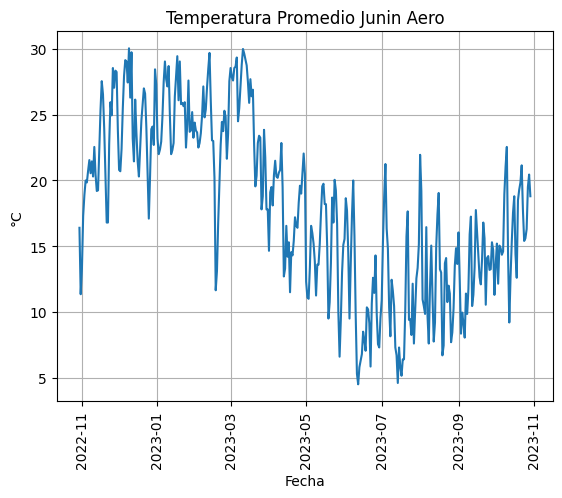

<function matplotlib.pyplot.show(close=None, block=None)>

In [22]:
#R.G.: Grafico
fecha_junin = df_junin_aero['FECHA']
tprom_junin = df_junin_aero['TPROM']
plt.plot(fecha_junin, tprom_junin)
plt.title('Temperatura Promedio Junin Aero')
plt.xlabel('Fecha')
plt.xticks(rotation=90)
plt.ylabel('°C')
plt.grid(True)
plt.show()
plt.show

In [23]:
min_df_junin_aero = df_junin_aero['TPROM'].min()
print(min_df_junin_aero)

indice_fila_min = df_junin_aero['TPROM'].idxmin()

# Ubico la fila con el índice obtenido
fila_min = df_junin_aero.loc[indice_fila_min]

# Imprimo la fila que contiene el valor mínimo
print(fila_min)

4.5
FECHA     2023-06-12 00:00:00
TMAX                     12.8
TMIN                     -3.8
NOMBRE             JUNIN AERO
TPROM                     4.5
Name: 16579, dtype: object


In [24]:
# Ordeno la columna 'TPROM' en orden ascendente y seleccionar el segundo valor mínimo
segunda_temp_min_tprom = df_junin_aero['TPROM'].nsmallest(2).iloc[-1]

# Imprimo la segunda temperatura mínima
print(f"La segunda temperatura mínima de TPROM es: {segunda_temp_min_tprom}")

indice_2da_temp_min = df_junin_aero['TPROM'].nsmallest(2).index[-1]

# Ubico la fila con el índice obtenido
fila_2da_temp_min = df_junin_aero.loc[indice_2da_temp_min]

# Imprimo la fila que contiene la segunda temperatura mínima
print(fila_2da_temp_min)

La segunda temperatura mínima de TPROM es: 4.6
FECHA     2023-07-14 00:00:00
TMAX                     10.1
TMIN                     -0.9
NOMBRE             JUNIN AERO
TPROM                     4.6
Name: 12758, dtype: object


In [25]:
#R.G.: Tomo esta fecha como comienzo del periodo.
#R.G.: Y como fin del periodo la fecha más reciente
fecha_mas_reciente = df_junin_aero['FECHA'].max()

# Imprimo la fecha más reciente
print(f"La fecha más reciente es: {fecha_mas_reciente}")

La fecha más reciente es: 2023-10-29 00:00:00


In [26]:
#R.G.: Periodo 14-07-2023 al 29-10-2023. Creo el nuevo df_junin_periodo
df_junin_periodo = df_junin_aero[(df_junin_aero['FECHA'] >= '2023-07-23') & (df_junin_aero['FECHA'] <= '2023-10-29')]

# Imprimir el nuevo DataFrame
print(df_junin_periodo)

           FECHA  TMAX  TMIN      NOMBRE  TPROM
11699 2023-07-23  15.9   2.9  JUNIN AERO   9.40
11581 2023-07-24  12.8   6.1  JUNIN AERO   9.45
11463 2023-07-25  13.6   2.9  JUNIN AERO   8.25
11345 2023-07-26  16.3   8.0  JUNIN AERO  12.15
11227 2023-07-27  14.2   1.0  JUNIN AERO   7.60
...          ...   ...   ...         ...    ...
521   2023-10-25  22.1   9.1  JUNIN AERO  15.60
402   2023-10-26  24.6   8.0  JUNIN AERO  16.30
283   2023-10-27  27.1  11.9  JUNIN AERO  19.50
164   2023-10-28  29.1  11.8  JUNIN AERO  20.45
45    2023-10-29  23.6  14.0  JUNIN AERO  18.80

[99 rows x 5 columns]


In [27]:
#R.G.: Chequeo fechas
df_junin_periodo_fecha_mas_antigua = df_junin_periodo['FECHA'].min()
print("Fecha más antigua: ", df_junin_periodo_fecha_mas_antigua)
df_junin_periodo_fecha_mas_reciente = df_junin_periodo['FECHA'].max()
print("Fecha más reciente: ", df_junin_periodo_fecha_mas_reciente)

Fecha más antigua:  2023-07-23 00:00:00
Fecha más reciente:  2023-10-29 00:00:00


PUNTO 2

Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:
VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR, a menor temperatura el precio será menor. Definir el rango del precio del helado y la tasa o porcentaje de incremento del precio.

In [28]:
#R.G.: Defino los precios del kilo de helado teniendo en cuenta las variables que me marca la consigna.
#R.G.: Precio mínimo del helado
precio_min = 100
#R.G.: Precio máximo del helado
precio_max = 500
#R.G.: Tasa de incremento del precio en función de la temperatura
tasa_incremento = 10

# Calculo el precio del helado en función de TPROM
df_junin_periodo.loc[:, 'PRECIO_KILO_HELADO'] = precio_min + (df_junin_periodo['TPROM'] * tasa_incremento)

# Asegurarse de que los precios no excedan el precio máximo
df_junin_periodo['PRECIO_KILO_HELADO'] = df_junin_periodo['PRECIO_KILO_HELADO'].clip(upper=precio_max)

# Mostrar el DataFrame resultante con la nueva columna
print(df_junin_periodo)

           FECHA  TMAX  TMIN      NOMBRE  TPROM  PRECIO_KILO_HELADO
11699 2023-07-23  15.9   2.9  JUNIN AERO   9.40               194.0
11581 2023-07-24  12.8   6.1  JUNIN AERO   9.45               194.5
11463 2023-07-25  13.6   2.9  JUNIN AERO   8.25               182.5
11345 2023-07-26  16.3   8.0  JUNIN AERO  12.15               221.5
11227 2023-07-27  14.2   1.0  JUNIN AERO   7.60               176.0
...          ...   ...   ...         ...    ...                 ...
521   2023-10-25  22.1   9.1  JUNIN AERO  15.60               256.0
402   2023-10-26  24.6   8.0  JUNIN AERO  16.30               263.0
283   2023-10-27  27.1  11.9  JUNIN AERO  19.50               295.0
164   2023-10-28  29.1  11.8  JUNIN AERO  20.45               304.5
45    2023-10-29  23.6  14.0  JUNIN AERO  18.80               288.0

[99 rows x 6 columns]


<ipython-input-28-c8def93847e1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junin_periodo.loc[:, 'PRECIO_KILO_HELADO'] = precio_min + (df_junin_periodo['TPROM'] * tasa_incremento)
<ipython-input-28-c8def93847e1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junin_periodo['PRECIO_KILO_HELADO'] = df_junin_periodo['PRECIO_KILO_HELADO'].clip(upper=precio_max)


In [29]:
#R.G.: Quiero ver donde están los precios de helado min y max
min_precio_helado = df_junin_periodo['PRECIO_KILO_HELADO'].min()
print("Precio min kg helado: ", min_precio_helado)

indice_fila_precio_min = df_junin_periodo['PRECIO_KILO_HELADO'].idxmin()

# Ubico la fila con el índice obtenido
fila_precio_min = df_junin_periodo.loc[indice_fila_precio_min]

# Imprimo la fila que contiene el valor mínimo
print(fila_precio_min)

print("\n")
#R.G.: Lo mismo con el precio máximo
max_precio_helado = df_junin_periodo['PRECIO_KILO_HELADO'].max()
print("Precio max kg helado: ", max_precio_helado)

indice_fila_precio_max = df_junin_periodo['PRECIO_KILO_HELADO'].idxmax()

# Ubico la fila con el índice obtenido
fila_precio_max = df_junin_periodo.loc[indice_fila_precio_max]

# Imprimo la fila que contiene el valor mínimo
print(fila_precio_max)

Precio min kg helado:  167.0
FECHA                 2023-08-19 00:00:00
TMAX                                 12.4
TMIN                                  1.0
NOMBRE                         JUNIN AERO
TPROM                                 6.7
PRECIO_KILO_HELADO                  167.0
Name: 8490, dtype: object


Precio max kg helado:  325.5
FECHA                 2023-10-10 00:00:00
TMAX                                 30.6
TMIN                                 14.5
NOMBRE                         JUNIN AERO
TPROM                               22.55
PRECIO_KILO_HELADO                  325.5
Name: 2306, dtype: object


COMPRA HELADO: VARIABLE CATEGORICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.

In [30]:
precio_inicial = 100
precio_helado = df_junin_periodo['PRECIO_KILO_HELADO']

# Crear la variable categórica "COMPRA_HELADO" con simulación aleatoria
probabilidades = np.where(precio_helado > precio_inicial * 0.4, 0.8, 0.2)

# Asegurarse de que el vector 'probabilidades' sea unidimensional
probabilidades = np.random.choice(probabilidades)

df_junin_periodo['COMPRA_HELADO'] = np.random.choice(['NO', 'SI'], p=[probabilidades, 1 - probabilidades], size=len(df_junin_periodo))
print(df_junin_periodo)

           FECHA  TMAX  TMIN      NOMBRE  TPROM  PRECIO_KILO_HELADO  \
11699 2023-07-23  15.9   2.9  JUNIN AERO   9.40               194.0   
11581 2023-07-24  12.8   6.1  JUNIN AERO   9.45               194.5   
11463 2023-07-25  13.6   2.9  JUNIN AERO   8.25               182.5   
11345 2023-07-26  16.3   8.0  JUNIN AERO  12.15               221.5   
11227 2023-07-27  14.2   1.0  JUNIN AERO   7.60               176.0   
...          ...   ...   ...         ...    ...                 ...   
521   2023-10-25  22.1   9.1  JUNIN AERO  15.60               256.0   
402   2023-10-26  24.6   8.0  JUNIN AERO  16.30               263.0   
283   2023-10-27  27.1  11.9  JUNIN AERO  19.50               295.0   
164   2023-10-28  29.1  11.8  JUNIN AERO  20.45               304.5   
45    2023-10-29  23.6  14.0  JUNIN AERO  18.80               288.0   

      COMPRA_HELADO  
11699            NO  
11581            SI  
11463            SI  
11345            NO  
11227            NO  
...            

<ipython-input-30-a3fdeec1eb1a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junin_periodo['COMPRA_HELADO'] = np.random.choice(['NO', 'SI'], p=[probabilidades, 1 - probabilidades], size=len(df_junin_periodo))


In [31]:
#R.G.: Necesito que COMPRA_HELADO tenga valores de 1 = SI, 0 = NO
df_junin_periodo['COMPRA_HELADO_NUM'] = df_junin_periodo['COMPRA_HELADO'].apply(lambda x: 1 if x == 'SI' else 0)

print(df_junin_periodo)

           FECHA  TMAX  TMIN      NOMBRE  TPROM  PRECIO_KILO_HELADO  \
11699 2023-07-23  15.9   2.9  JUNIN AERO   9.40               194.0   
11581 2023-07-24  12.8   6.1  JUNIN AERO   9.45               194.5   
11463 2023-07-25  13.6   2.9  JUNIN AERO   8.25               182.5   
11345 2023-07-26  16.3   8.0  JUNIN AERO  12.15               221.5   
11227 2023-07-27  14.2   1.0  JUNIN AERO   7.60               176.0   
...          ...   ...   ...         ...    ...                 ...   
521   2023-10-25  22.1   9.1  JUNIN AERO  15.60               256.0   
402   2023-10-26  24.6   8.0  JUNIN AERO  16.30               263.0   
283   2023-10-27  27.1  11.9  JUNIN AERO  19.50               295.0   
164   2023-10-28  29.1  11.8  JUNIN AERO  20.45               304.5   
45    2023-10-29  23.6  14.0  JUNIN AERO  18.80               288.0   

      COMPRA_HELADO  COMPRA_HELADO_NUM  
11699            NO                  0  
11581            SI                  1  
11463            SI     

<ipython-input-31-07db61c5c2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junin_periodo['COMPRA_HELADO_NUM'] = df_junin_periodo['COMPRA_HELADO'].apply(lambda x: 1 if x == 'SI' else 0)


3. GENERAR TRES  PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE)CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:

  * SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. ( los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)

In [32]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
temperatura = df_junin_periodo['TPROM']
precio_helado = df_junin_periodo['PRECIO_KILO_HELADO']

def logica_compra_helado(temperatura, precio_helado):
    if temperatura > 27 or precio_helado < (precio_min * 1.4):
        return 1
    else:
        return 0

# Aplico la lógica de compra de helado
df_junin_periodo['COMPRA_LOGICA'] = df_junin_periodo.apply(lambda row: logica_compra_helado(row['TPROM'], row['PRECIO_KILO_HELADO']), axis=1)

# Utilizo solo las columnas relevantes para el modelo
X = df_junin_periodo[['TPROM', 'PRECIO_KILO_HELADO']]
y = df_junin_periodo['COMPRA_LOGICA']

# Defino la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilo el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entreno el modelo
model.fit(X, y, epochs=100, validation_split=0.2)

<ipython-input-44-d87a9f7d1a16>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junin_periodo['COMPRA_LOGICA'] = df_junin_periodo.apply(lambda row: logica_compra_helado(row['TPROM'], row['PRECIO_KILO_HELADO']), axis=1)


Epoch 1/100
3/3 [==============================] - 2s 94ms/step - loss: 3.7161e-35 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 3.7161e-35 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 3.7161e-35 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 3.7161e-35 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 3.7161e-35 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 3.7161e-35 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 3.7161e-35 - accuracy: 1.0000 - val_loss

In [34]:
print(df_junin_periodo)

           FECHA  TMAX  TMIN      NOMBRE  TPROM  PRECIO_KILO_HELADO  \
11699 2023-07-23  15.9   2.9  JUNIN AERO   9.40               194.0   
11581 2023-07-24  12.8   6.1  JUNIN AERO   9.45               194.5   
11463 2023-07-25  13.6   2.9  JUNIN AERO   8.25               182.5   
11345 2023-07-26  16.3   8.0  JUNIN AERO  12.15               221.5   
11227 2023-07-27  14.2   1.0  JUNIN AERO   7.60               176.0   
...          ...   ...   ...         ...    ...                 ...   
521   2023-10-25  22.1   9.1  JUNIN AERO  15.60               256.0   
402   2023-10-26  24.6   8.0  JUNIN AERO  16.30               263.0   
283   2023-10-27  27.1  11.9  JUNIN AERO  19.50               295.0   
164   2023-10-28  29.1  11.8  JUNIN AERO  20.45               304.5   
45    2023-10-29  23.6  14.0  JUNIN AERO  18.80               288.0   

      COMPRA_HELADO  COMPRA_HELADO_NUM  COMPRA_LOGICA  
11699            NO                  0              0  
11581            SI                

In [35]:
#R.G.: Quiero ver si compra lógica en alguna fila dice SI
hay_uno = df_junin_periodo['COMPRA_LOGICA'].any()
if hay_uno:
    print("Hay al menos un 1 en la columna 'COMPRA_LOGICA'.")
else:
    print("No hay ningún 1 en la columna 'COMPRA_LOGICA'.")

No hay ningún 1 en la columna 'COMPRA_LOGICA'.


In [36]:
#R.G.: Quiero ver si hay una TPROM > a 27°C
tprom_max = df_junin_periodo['TPROM'].max()
print("TPROM max: ", tprom_max)

indice_fila_tprom_max = df_junin_periodo['TPROM'].idxmax()

# Ubico la fila con el índice obtenido
fila_tprom_max = df_junin_periodo.loc[indice_fila_tprom_max]

# Imprimo la fila que contiene el valor mínimo
print(fila_tprom_max)

TPROM max:  22.55
FECHA                 2023-10-10 00:00:00
TMAX                                 30.6
TMIN                                 14.5
NOMBRE                         JUNIN AERO
TPROM                               22.55
PRECIO_KILO_HELADO                  325.5
COMPRA_HELADO                          NO
COMPRA_HELADO_NUM                       0
COMPRA_LOGICA                           0
Name: 2306, dtype: object


In [37]:
#Como la TPROM máxima es 22.55°C nunca va a dar SI en COMPRA_LOGICA

In [38]:
#R.G.: Quiero ver si PRECIO_KILO_HELADO > a precio min x 1.4
precio_kilo_helado_min = df_junin_periodo['PRECIO_KILO_HELADO'].min()
print("Precio kilo helado min: $", precio_kilo_helado_min)

indice_fila_precio_kilo_helado_min = df_junin_periodo['PRECIO_KILO_HELADO'].idxmin()

# Ubico la fila con el índice obtenido
fila_precio_kilo_helado_min = df_junin_periodo.loc[indice_fila_precio_kilo_helado_min]

print("\n")
# Imprimo la fila que contiene el valor mínimo
print(fila_precio_kilo_helado_min)
print("\n")
print("Precio min helado + 40%: $", precio_min * 1.4)

Precio kilo helado min: $ 167.0


FECHA                 2023-08-19 00:00:00
TMAX                                 12.4
TMIN                                  1.0
NOMBRE                         JUNIN AERO
TPROM                                 6.7
PRECIO_KILO_HELADO                  167.0
COMPRA_HELADO                          NO
COMPRA_HELADO_NUM                       0
COMPRA_LOGICA                           0
Name: 8490, dtype: object


Precio min helado + 40%: $ 140.0


In [ ]:
#Como el PRECIO_HELADO_KILO minimo es $167 nunca va a dar SI en COMPRA_LOGICA

4. Luego de diseñar los perceptrones, implementarlos sobre la base de datos generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.

In [39]:
from sklearn.metrics import accuracy_score

# Obtener las predicciones del modelo
predicciones = (model.predict(X) > 0.5).astype("int32")

# Calcular la precisión
precision = accuracy_score(y, predicciones)
print("Precisión del modelo:", precision)

4/4 [==============================] - 0s 4ms/step
Precisión del modelo: 1.0


In [43]:
#R.G.: Voy a bajar la temperatura de la consigna a 20°C y el precio si duplica el mínimo
def logica_compra_helado(temperatura, precio_helado):
    if temperatura > 20 or precio_helado < (precio_min * 2):
        return 1
    else:
        return 0

# Aplico la lógica de compra de helado
df_junin_periodo['COMPRA_LOGICA2'] = df_junin_periodo.apply(lambda row: logica_compra_helado(row['TPROM'], row['PRECIO_KILO_HELADO']), axis=1)

# Utilizo solo las columnas relevantes para el modelo
X = df_junin_periodo[['TPROM', 'PRECIO_KILO_HELADO']]
y = df_junin_periodo['COMPRA_LOGICA2']

# Defino la red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilo el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entreno el modelo
model.fit(X, y, epochs=100, validation_split=0.2)


Epoch 1/100


<ipython-input-43-298131536c52>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_junin_periodo['COMPRA_LOGICA2'] = df_junin_periodo.apply(lambda row: logica_compra_helado(row['TPROM'], row['PRECIO_KILO_HELADO']), axis=1)


3/3 [==============================] - 1s 98ms/step - loss: 27.5562 - accuracy: 0.2532 - val_loss: 31.8174 - val_accuracy: 0.2000
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 26.1116 - accuracy: 0.2532 - val_loss: 30.1189 - val_accuracy: 0.2000
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 24.7347 - accuracy: 0.2532 - val_loss: 28.4542 - val_accuracy: 0.2000
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 23.3269 - accuracy: 0.2532 - val_loss: 26.8278 - val_accuracy: 0.2000
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 21.9839 - accuracy: 0.2532 - val_loss: 25.2226 - val_accuracy: 0.2000
Epoch 6/100
3/3 [==============================] - 0s 17ms/step - loss: 20.6922 - accuracy: 0.2532 - val_loss: 23.6403 - val_accuracy: 0.2000
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 19.3556 - accuracy: 0.2532 - val_loss: 22.0925 - val_accuracy: 0.2000
Epoch 8/100
3/3 [=

In [45]:
#R.G.: Quiero ver si hay SI (1) en COMPRA_LOGICA2
print(df_junin_periodo)
df_junin_periodo.head(10)

           FECHA  TMAX  TMIN      NOMBRE  TPROM  PRECIO_KILO_HELADO  \
11699 2023-07-23  15.9   2.9  JUNIN AERO   9.40               194.0   
11581 2023-07-24  12.8   6.1  JUNIN AERO   9.45               194.5   
11463 2023-07-25  13.6   2.9  JUNIN AERO   8.25               182.5   
11345 2023-07-26  16.3   8.0  JUNIN AERO  12.15               221.5   
11227 2023-07-27  14.2   1.0  JUNIN AERO   7.60               176.0   
...          ...   ...   ...         ...    ...                 ...   
521   2023-10-25  22.1   9.1  JUNIN AERO  15.60               256.0   
402   2023-10-26  24.6   8.0  JUNIN AERO  16.30               263.0   
283   2023-10-27  27.1  11.9  JUNIN AERO  19.50               295.0   
164   2023-10-28  29.1  11.8  JUNIN AERO  20.45               304.5   
45    2023-10-29  23.6  14.0  JUNIN AERO  18.80               288.0   

      COMPRA_HELADO  COMPRA_HELADO_NUM  COMPRA_LOGICA  COMPRA_LOGICA2  
11699            NO                  0              0               1  
115

,FECHA,TMAX,TMIN,NOMBRE,TPROM,PRECIO_KILO_HELADO,COMPRA_HELADO,COMPRA_HELADO_NUM,COMPRA_LOGICA,COMPRA_LOGICA2
11699,2023-07-23,15.9,2.9,JUNIN AERO,9.40,194.0,NO,0,0,1
11581,2023-07-24,12.8,6.1,JUNIN AERO,9.45,194.5,SI,1,0,1
11463,2023-07-25,13.6,2.9,JUNIN AERO,8.25,182.5,SI,1,0,1
11345,2023-07-26,16.3,8.0,JUNIN AERO,12.15,221.5,NO,0,0,0
11227,2023-07-27,14.2,1.0,JUNIN AERO,7.60,176.0,NO,0,0,1
11108,2023-07-28,18.5,1.6,JUNIN AERO,10.05,200.5,NO,0,0,0
10989,2023-07-29,19.1,6.0,JUNIN AERO,12.55,225.5,NO,0,0,0
10870,2023-07-30,21.7,5.0,JUNIN AERO,13.35,233.5,NO,0,0,0
10751,2023-07-31,24.1,6.2,JUNIN AERO,15.15,251.5,SI,1,0,0
10632,2023-08-01,28.6,15.3,JUNIN AERO,21.95,319.5,SI,1,0,1


In [52]:
#R.G.: Para obtener predicciones de la red neuronal
prediccion = model.predict(X)

#R.G.: Comparo las predicciones con los valores reales
predicciones_red = [1 if p > 0.5 else 0 for p in predicciones.flatten()]
valores_reales = y

#R.G.: Calculo la proporción de respuestas correctas
proporcion_correcta = sum(predicciones_red == valores_reales) / len(valores_reales)
print(f'La proporción de respuestas correctas es: {proporcion_correcta}')

4/4 [==============================] - 0s 3ms/step
La proporción de respuestas correctas es: 1.0
